Question 1:


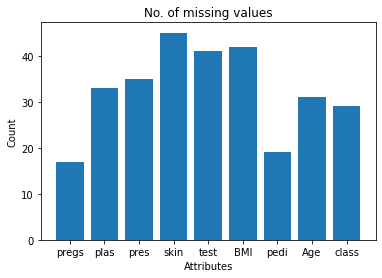

Question 2:
a)

Total no. of tuples deleted: 39

Row no. of deleted tuples:
 1 39 40 53 54 83 89 103 125 136 145 210 211 212 213 249 250 254 280 281 284 314 321 335 429 430 449 450 451 471 472 473 474 718 719 720 721 753 766

b)

Total no. of tuples deleted: 21

Row no. of deleted tuples:
 8 13 28 29 35 62 92 95 107 110 130 131 132 133 149 182 188 218 308 746 748

Question 3:

pregs : 0
plas : 12
pres : 9
skin : 8
test : 8
BMI : 12
pedi : 2
Age : 18
class : 0

Total no. of missing values: 69

Question 4:
a)
i)

New Data:

             Mean      Median   Mode1    Mode2  Statndard Dev
pregs    3.885593    3.000000   1.000      NaN       3.373860
plas   120.666667  118.000000  99.000  100.000      30.990181
pres    69.001431   72.000000  70.000      NaN      19.691360
skin    20.348571   23.000000   0.000      NaN      15.946203
test    77.814286   36.000000   0.000      NaN     110.607605
BMI     32.009339   32.009339  32.000      NaN       7.764755
pedi     0.476042    0.382500   0.254 

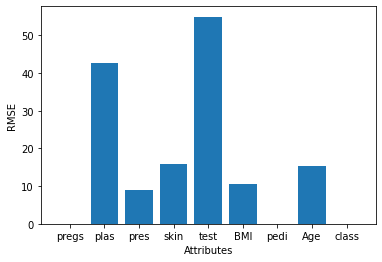


b)
i)

New Data:

             Mean    Median   Mode1    Mode2  Statndard Dev
pregs    3.885593    3.0000   1.000      NaN       3.373860
plas   120.349576  117.0000  99.000  100.000      31.274798
pres    69.109463   72.0000  70.000      NaN      19.735986
skin    20.392655   23.0000   0.000      NaN      15.975849
test    77.355226   27.0000   0.000      NaN     110.755991
BMI     32.046328   32.2500  32.000      NaN       7.792615
pedi     0.477325    0.3825   0.254    0.258       0.334248
Age     33.216102   29.0000  22.000      NaN      11.652648
class    0.343220    0.0000   0.000      NaN       0.475120

Original Data:

             Mean    Median   Mode1    Mode2  Statndard Dev
pregs    3.845052    3.0000   1.000      NaN       3.369578
plas   120.894531  117.0000  99.000  100.000      31.972618
pres    69.105469   72.0000  70.000      NaN      19.355807
skin    20.536458   23.0000   0.000      NaN      15.952218
test    79.799479   30.5000   0.000      NaN     115.244002
BMI 

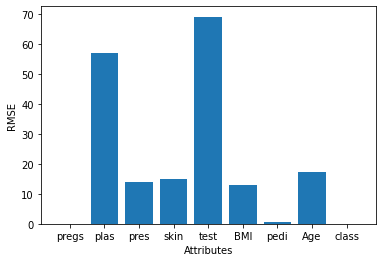


Question 5:
i)

Outliers in Age:
69.0 67.0 72.0 81.0 67.0 70.0 68.0 69.0

Outliers in BMI:
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 53.2 67.1 52.3 52.3 52.9 59.4 57.3


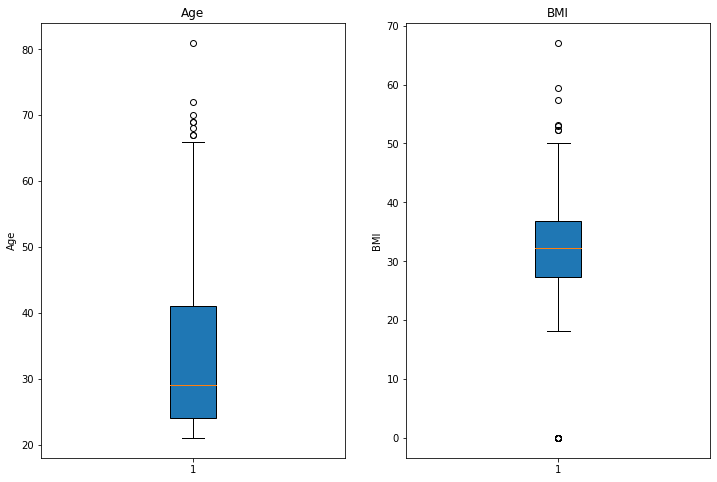

ii)


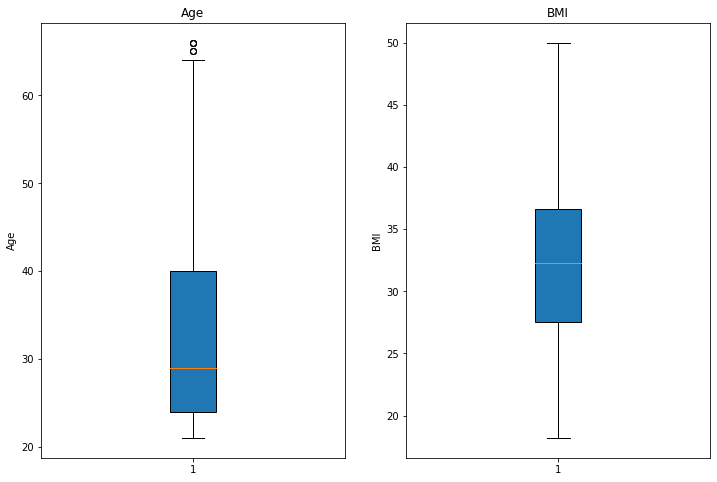

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('pima_indians_diabetes_miss.csv') 
df_org=pd.read_csv('pima_indians_diabetes_original.csv') 

#Question 1
print('Question 1:')
count_na=len(df)-df.describe().loc['count']
plt.bar(df.columns,count_na)
plt.xlabel('Attributes');plt.ylabel('Count')
plt.title('No. of missing values');plt.show()

#Question 2
print('Question 2:')
#a
print('a)\n')
del_tuple=[]
null_val=df.isna()
for i in range(len(df)):
    if sum(null_val.iloc[i])>=(1/3*len(df.columns)):
        del_tuple.append(i)
df.drop(del_tuple,inplace=True)
print('Total no. of tuples deleted:',len(del_tuple))
print('\nRow no. of deleted tuples:\n',*del_tuple)
#b
print('\nb)')
del_tuple=df[df['class'].isna()]
df.drop(del_tuple.index,inplace=True)
print('\nTotal no. of tuples deleted:',len(del_tuple.index))
print('\nRow no. of deleted tuples:\n',*del_tuple.index)

#Question3
print('\nQuestion 3:\n')
count_na=len(df)-df.describe().loc['count']
for i in range(len(df.columns)):
    print(df.columns[i],':',int(count_na[i]))
print('\nTotal no. of missing values:',int(sum(count_na)))

#Question 4
print('\nQuestion 4:')
def filling(df):
    data=pd.concat((df.mean(),df.median(),df.mode().loc[0],
            df.mode().loc[1],df.std()),axis=1,)
    index=[['Mean','Median','Mode1','Mode2','Statndard Dev']]
    data=data.T
    data.set_index(index,inplace=True)
    data=data.T
    print('New Data:\n')
    print(data)
    
    data_org=pd.concat((df_org.mean(),df_org.median(),df_org.mode().loc[0],
            df_org.mode().loc[1],df_org.std()),axis=1,)
    data_org=data_org.T
    data_org.set_index(index,inplace=True)
    data_org=data_org.T
    print('\nOriginal Data:\n')
    print(data_org)
def RMSE(df_):
    print('RMSE:\n')
    RMSE=[0]*len(df.columns)
    n=0
    for i in df.columns:
        null_index=df[i][df[i].isna()].index
        if len(null_index)==0:
            RMSE[n]=0
        else:
            for j in null_index:
                RMSE[n]+=(df_[i][j]-df_org[i][j])**2
                
            RMSE[n]/=len(null_index)
            RMSE[n]**=0.5
        print(i,':',RMSE[n])
        n+=1
    plt.bar(df.columns,RMSE)
    plt.xlabel('Attributes')
    plt.ylabel('RMSE')
    plt.show()

#a
print('a)')
df_a=df.fillna(df.mean())
#i
print('i)\n')
filling(df_a)
#ii
print('\nii)\n')
RMSE(df_a)

#b
print('\nb)')
df_b=df.interpolate()
#i
print('i)\n')
filling(df_b)
#ii
print('\nii)\n')
RMSE(df_b)

#Question 5
print('\nQuestion 5:')
df=df_b

def outliers(x):
    minimum=2.5*np.percentile(df[x],25)-1.5*np.percentile(df[x],75)
    maximum=2.5*np.percentile(df[x],75)-1.5*np.percentile(df[x],25)
    outliers_=pd.concat((df[x][df[x]< minimum],df[x][df[x]> maximum]))
    return outliers_

def boxplot():
    fig,axs=plt.subplots(1,2,figsize=(12,8))
    axs[0].boxplot(df['Age'],vert=True,patch_artist=True)
    axs[0].set_title('Age')
    axs[0].set_ylabel('Age')
    axs[1].boxplot(df['BMI'],vert=True,patch_artist=True)
    axs[1].set_title('BMI')
    axs[1].set_ylabel('BMI')
    plt.show()

#i
print('i)\n')
print('Outliers in Age:')
print(*outliers('Age').values)
print('\nOutliers in BMI:')
print(*outliers('BMI').values)
boxplot()
#ii
print('ii)')
outliers_age=outliers('Age')
df['Age'][outliers_age.index]=df['Age'].median()
outliers_bmi=outliers('BMI')
df['BMI'][outliers_bmi.index]=df['BMI'].median()
boxplot()
